# This notebook contain the Assignment 1 for the week-1

### Implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once.

In [1]:
# defining some functions 
import os
import matplotlib.pyplot as plt


def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome


def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t


def naive_with_rc(p, t):
    p_rev = reverseComplement(p)
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if not match:
            match = True
            for j in range(len(p)):  # loop over characters
                if t[i + j] != p_rev[j]:  # compare characters
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [2]:
# reading the genome file
genome_file = 'lambda_virus.fa'
genome = readGenome(genome_file)



## Question - 1

In [3]:
# Question1
print(len(naive_with_rc('AGGT', genome)))

306


## Question - 2

In [4]:
# Question2
print(len(naive_with_rc('TTAA', genome)))

195


## Question - 3

In [5]:
# Question3
print(min(naive_with_rc('ACTAAGT', genome)))

26028


## Question - 4

In [6]:
# Question4
print(min(naive_with_rc('AGTCGA', genome)))

450


### As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

### For Questions 5 and 6, make a new version of the \verb|naive|naive function called \verb|naive_2mm|naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.

In [7]:
# defining the Naive_2mm 
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        count_mismatch = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                count_mismatch += 1
        if count_mismatch <= 2:
            occurrences.append(i)  # all chars matched; record
    return occurrences

## Question - 5

In [8]:
# Question5
print(len(naive_2mm('TTCAAGCC', genome)))

191


## Question - 6

In [9]:
# Question6
print(min(naive_2mm('AGGAGGTT', genome)))

49


### Q7. Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds to a particular offset in all the reads

## Question - 7

In [11]:
# defining the functions
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


def phred33ToQ(qual):
    return ord(qual) - 33


def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*len(qualities[0])
    for qual in qualities:
        for i in range(len(qual)):
            q = phred33ToQ(qual[i])
            hist[i] += q
    return hist

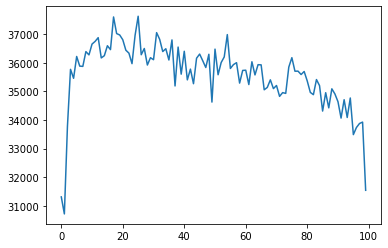

In [15]:
%matplotlib inline
reads_file = 'ERR266411_1.first1000.fastq' 
_, quals = readFastq(reads_file)
qual_hist = createHist(quals)
plt.plot(range(len(qual_hist)), qual_hist)
plt.show()